# Load the trained model and show some predictions 

In [1]:
import torch
import numpy as np
import sys
sys.path.insert(0,'..')
from src.data import ImagenetteDataLoader, Imagenette, ToTensor, get_train_validation_data
from torchvision import transforms
import torchvision.models as models
import matplotlib.pyplot as plt
print(torch.__version__)

1.7.0


In [2]:
## run time for resnet18 - no reg : ~250s per epoch (batch_size = 256)
## run time for resnet18 - with reg: ~430s per epoch (batch_size = 128)


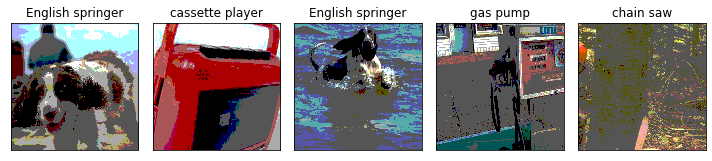

In [3]:
unnormalize_image = lambda im : ((im * sigma2.reshape(3,1,1)) +  mu2.reshape(3,1,1)).int() 

IMAGENETTE_LABEL_IDS = {
    'tench': 0,
    'English springer': 1,
    'cassette player': 2,
    'chain saw': 3,
    'church': 4,
    'French horn': 5,
    'garbage truck': 6,
    'gas pump': 7,
    'golf ball': 8,
    'parachute': 9,
}
mu2 = np.array([0.46254329, 0.45792598, 0.42990307])*255
sigma2 = np.array([0.24124826, 0.23532296, 0.24335882])*255
transform = transforms.Compose([ToTensor(),
                                transforms.Normalize(mu2, sigma2),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(256)
                               ])

valid_loader = ImagenetteDataLoader(root_dir='../data/imagenette2-320', train=False, crop_size=256,
                          batch_size=32, shuffle=True,transform=transform)
valid_loader.show_batch()

In [4]:
## load the trained model
path = '../models/resnet_num_19/'
model = models.resnet18()
model.fc= torch.nn.Linear(512, 10)
learned_params =torch.load(path + 'model.pt', map_location='cpu' )
model.load_state_dict(learned_params)
model.eval();
val_acc = np.load(path + 'valid_logs.npy', allow_pickle=True).item()['accuracy'][-1]
print('validation accuracy ', val_acc)

validation accuracy  0.861656050955414


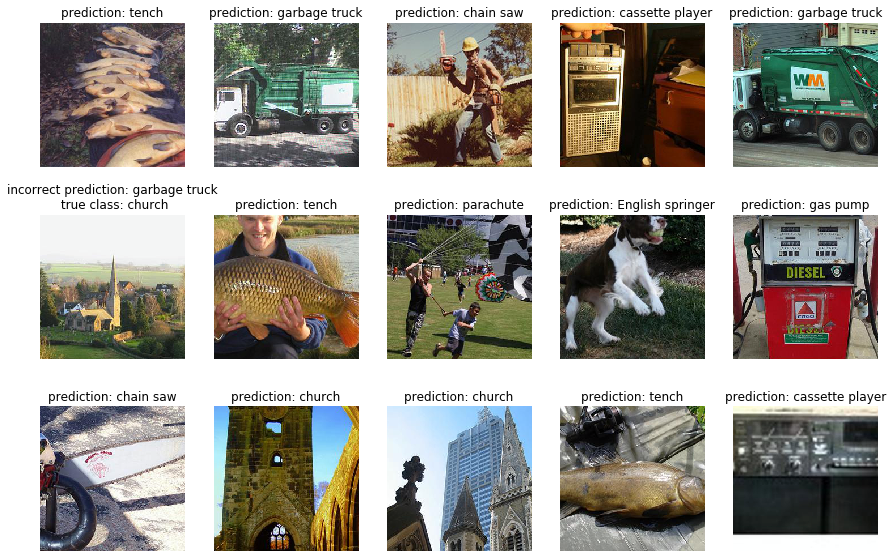

In [5]:
# show random images with prediction

indices = torch.randint(low = 0, high= len(valid_loader.dataset), size=(1,15))
f, axs = plt.subplots(3,5, figsize=(15,10))
axs = axs.ravel()
for i, j in zip(indices[0], range(len(axs))):
    test_image = valid_loader.dataset[i]['image']
    test_label = valid_loader.dataset[i]['label']
    out = model(test_image.unsqueeze(0))

    axs[j].imshow(unnormalize_image(test_image).permute(1,2,0))
    predicted_class = list(IMAGENETTE_LABEL_IDS.keys())[list(IMAGENETTE_LABEL_IDS.values()).index(out.argmax().item())]
    axs[j].set_title('prediction: ' + predicted_class)
    if out.argmax().item()!= test_label: 
        true_class = list(IMAGENETTE_LABEL_IDS.keys())[list(IMAGENETTE_LABEL_IDS.values()).index(test_label)]
        axs[j].set_title('incorrect prediction: ' + predicted_class + '\n true class: ' + true_class)
    axs[j].axis('off')
